# Project 7 - Logistic Regression and Support Vector Machines

## Notebook imports and settings

In [16]:
# Python imports

# Numerical imports
import numpy as np
import pandas as pd

# SkLearn imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit


# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting settings
sns.set()
sns.set_palette("colorblind")
sns.set_style("ticks")


## Load and format data

In [20]:
bank_notes = pd.read_csv("data_banknote_authentication.txt", sep=",", header = None, names = ['variance', 'skewness', 'curtosis', 'entropy', 'class' ])

#bank_notes.head(2)

# Shuffling the data set
bank_notes = bank_notes.sample(frac = 1)


#display(bank_notes.head(5))

# Split into test / train when not using SSS
# split = int(0.8 * len(bank_notes))
# bank_notes_train = bank_notes[:split]
# bank_notes_test = bank_notes[split:]

# # Threshold for 1 = good, 0 = bad; threshold value chosen for 50/50 dataset split
# red_wine[red_wine["quality"] < 6] = 0
# red_wine[red_wine["quality"] >= 6] = 1

# white_wine[white_wine["quality"] < 5] = 0
# white_wine[white_wine["quality"] >= 5] = 1

# combined_wine = pd.concat([red_wine, white_wine])

# print("____WHITE WINE____")
# display(white_wine.tail(3))

# print("____RED WINE____")
# display(red_wine.tail(3))

# print("____BOTH WINES____")
# display(combined_wine.tail(3))

Precision with bad wine:  0.9909
Precision with good wine: 0.9889

Recall with bad wine:     0.9869
Recall with good wine:    0.9939

F1 Score with bad wine:   0.9909
F1 Score with good wine:  0.9889



D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Logistic Regression

In [23]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

y = bank_notes_train[["class"]]
X = bank_notes_train.drop("class", axis=1)

precision, recall, f1 = 0., 0, 0.

for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index].values.flatten()
    
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index].values.flatten()
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.coef_)
    
    
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred)
    precision += f
    recall += r
    f1 += f
    
precision /= 5
recall /= 5
f1 /= 5

print(f"Precision of good bills:  {precision[0]:.4f}")
print(f"Precision of bad bills: {precision[1]:.4f}")
print()

print(f"Recall of good bills:     {recall[0]:.4f}")
print(f"Recall of bad bills:    {recall[1]:.4f}")
print()

print(f"F1 Score of good bills:   {f1[0]:.4f}")
print(f"F1 Score of bad bills:  {f1[1]:.4f}")
print()

[[-2.69462849 -1.61101365 -1.89770509 -0.19749365]]
[[-2.6348405  -1.72616791 -1.94497139 -0.27272345]]
[[-2.67498386 -1.68643534 -1.93538923 -0.24984093]]
[[-2.64268779 -1.61914621 -1.86286628 -0.20002798]]
[[-2.61008874 -1.55040713 -1.86380099 -0.15419103]]
Precision of good bills:  0.9909
Precision of bad bills: 0.9889

Recall of good bills:     0.9869
Recall of bad bills:    0.9939

F1 Score of good bills:   0.9909
F1 Score of bad bills:  0.9889



D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Support Vector Machine (SVM)

In [22]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

y = bank_notes_train[["class"]]
X = bank_notes_train.drop("class", axis=1)

precision, recall, f1 = 0., 0, 0.

for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index].values.flatten()
    
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index].values.flatten()
    
    clf = SVC(random_state=0, gamma = 'auto').fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred)
    precision += f
    recall += r
    f1 += f
    
precision /= 5
recall /= 5
f1 /= 5

print(f"Precision of good bills:  {precision[0]:.4f}")
print(f"Precision of bad bills: {precision[1]:.4f}")
print()

print(f"Recall of good bills:     {recall[0]:.4f}")
print(f"Recall of bad bills:    {recall[1]:.4f}")
print()

print(f"F1 Score of good bills:   {f1[0]:.4f}")
print(f"F1 Score of bad bills:  {f1[1]:.4f}")
print()

Precision of good bills:  1.0000
Precision of bad bills: 1.0000

Recall of good bills:     1.0000
Recall of bad bills:    1.0000

F1 Score of good bills:   1.0000
F1 Score of bad bills:  1.0000



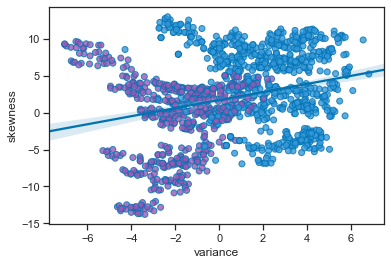

In [25]:
bank_notes["color"]= np.where(bank_notes["class"] == 1.0, "#9b59b6", "#3498db")

sns.regplot(x = 'variance', y= 'skewness', data = bank_notes, scatter_kws={'facecolors': bank_notes["color"]})